###  Islands: Generalized Linear Models - Chapter 5

[Back to Main Page](0_main_page.ipynb)

<br>

<h1> <center> Multinomial Logistic Regression </center> </h1>  

<br>
<center><img src = "images/island_mul_log_reg.png" width = 270></center>

Imagine you visting a new island, where you and a team of researchers are conducting social research about the three different religions that are practiced there. You collect

## Context



## Model

[Interested in the probability of events in various categories]

$ \large \hat{P}_{(y_{i} = 0)} = \hat\pi_{0i}$ 

$ \large \hat{P}_{(y_{i} = 1)} = \hat\pi_{1i} $

$ \dots $

$ \large \hat{P}_{(y_{i} = m)} = \hat\pi_{mi} $
[Show whole prediction equation]

$ \Large \hat{y}_{i} = ln\left(\frac{Pr(Y=j)}{Pr(Y=\text{Reference})}\right)_{i} = b_{0}^{j} + b_{1}^{j}x_{1i} + ... b_{k}^{j}x_{ki}  $

$ \large \hat{y}_{i} = ln \left( \frac{\hat\pi_{1}}{\hat\pi_{0}} \right)_i = b_{0} + b_{i}x_{11} \dots + b_{k}x_{ki} $

The individual prediction ($\hat{y_i}$), for all $n$ observations, using $k$ variables as predictors are:

$$ \large \hat{y}_{1} = ln \left( \frac{\hat\pi_{1}}{\hat\pi_{0}} \right)_1 = b_{0} + b_{1}x_{11} \dots + b_{k}x_{k1} $$

$$ \large \hat{y}_{2} = ln \left( \frac{\hat\pi_{1}}{\hat\pi_{0}} \right)_2 = b_{0} + b_{1}x_{12} \dots + b_{k}x_{k2} $$

$$ \large \hat{y}_{3} = ln \left( \frac{\hat\pi_{1}}{\hat\pi_{0}} \right)_3 = b_{0} + b_{1}x_{13} \dots + b_{k}x_{k3} $$

$$ \dots $$

$$ \large \hat{y}_{n} = ln \left( \frac{\hat\pi_{1}}{\hat\pi_{0}} \right)_n = b_{0} + b_{1}x_{1n} \dots + b_{k}x_{kn} $$

[explanation of above formulas, element by element here]

$$
\Large \begin{bmatrix}
           {\hat{y}_{1}} \\
           {\hat{y}_{2}} \\
           {\hat{y}_{3}} \\
           \vdots \\
           {\hat{y}_{n}}
         \end{bmatrix} = \begin{bmatrix}
           {ln \left( \frac{\hat\pi_{1}}{\hat\pi_{0}} \right)_1 } \\
           {ln \left( \frac{\hat\pi_{1}}{\hat\pi_{0}} \right)_2 } \\
           {ln \left( \frac{\hat\pi_{1}}{\hat\pi_{0}} \right)_3 }  \\
           \vdots \\
           {\ln \left( \frac{\hat\pi_{1}}{\hat\pi_{0}} \right)_n}
         \end{bmatrix} = \begin{bmatrix}
           {1} & {x_{11}} & \dots & {x_{k1}}\\ 
           {1} & {x_{12}} & \dots & {x_{k2}}\\ 
           {1} & {x_{13}} & \dots & {x_{k3}}\\ 
           \vdots & \vdots & \vdots & \vdots\\
           {1} & {x_{1n}} & \dots & {x_{kn}} \\ 
         \end{bmatrix} \begin{bmatrix}
           {b_{0}} \\ 
           \vdots \\
           {b_{k}} \\ 
         \end{bmatrix} 
$$


## Parameter estimates

The coefficients ($b_0, b_k$) can be estimated by...

For a single score:

[single score value here]

[illustration of different types of normal distribution here]

The predicted probability of falling into class $j$ for observation $i$:

$ \large \hat\pi_{ji} = \frac{e^{\hat{y_ji}}}{1 + e^{\hat{y_{1}}} + ... e^{\hat{y_{ji}}}}  = \frac{e^{\hat{y_ji}}}{1 + \sum{e^{\hat{y_{ji}}}}} $

For the reference category:

$ \large \hat\pi_{mi} = \frac{1}{1 + \sum{e^{\hat{y_{ji}}}}} = 1 - \sum \hat\pi_{ji} $

The model gets its parameters, by maximizing:

$ \large {\operatorname{arg max}} \prod \hat\pi_{0i}^{\text{indicator}_{0i}} \hat\pi_{1i}^{\text{indicator}_{1i}} ...\hat\pi_{ji}^{\text{indicator}_{ji}} $

[illustration of fitting several normal distribution around the regression line here]


Equivalently, by minimizing (has the same effect, but easier for a computer to work with):

[full log like here (with all j), show that because of dummies it reduces to:]

$ \large {\operatorname{arg min}} - \sum \text{indicator}_{ji} * \large[ \hat{y_{ji}}  - \ln(1 + \sum{e^{\hat{y_{ji}}}} )\large]$

[Explain how this works at the level of individual predictions]

## Implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import islands_GLM

islands_GLM.r_ify()

C:\Users\rushpz\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
# religion names from https://www.fantasynamegenerators.com/religion-names.php

pop_size = 100

religions = np.array(['Symmetrians', 'Communionists', 'Lamothians'])

income = np.random.gamma(1, size = pop_size) * 100

religion = np.array([])
bio_sex = np.array([])

for inc in income:
    
    if inc < np.median(income):
        
        religion = np.append(religion, np.random.choice(['Symmetrians', 'Communionists', 'Lamothians'], 
                                                       p = [3.5/6, 2.4/6, 0.1/6]))
        bio_sex = np.append(bio_sex, np.random.choice(['male', 'female'], p = [0.7, 0.3]))
        
    elif inc >= np.median(income):
        
        religion = np.append(religion, np.random.choice(['Symmetrians', 'Communionists', 'Lamothians'], 
                                                       p = [0.5/6, 2/6, 3.5/6]))
        bio_sex = np.append(bio_sex, np.random.choice(['male', 'female'], p = [0.3, 0.7]))
        
        
        
        
df = pd.DataFrame({'income': income.astype('int'), 'religion': religion, 'biological_sex': bio_sex})

df

,income,religion,biological_sex
0,105,Communionists,female
1,4,Communionists,male
2,93,Communionists,female
3,42,Communionists,female
4,41,Communionists,female
...,...,...,...
95,118,Lamothians,male
96,27,Symmetrians,female
97,111,Lamothians,male
98,401,Communionists,male


In [3]:
df['religion_dummy'] =  df['religion'].replace(df['religion'].unique(), np.arange(len(df['religion'].unique())))
df['biological_sex_dummy'] =  df['biological_sex'].replace(df['biological_sex'].unique(), np.arange(len(df['biological_sex'].unique())))
df

,income,religion,biological_sex,religion_dummy,biological_sex_dummy
0,105,Communionists,female,0,0
1,4,Communionists,male,0,1
2,93,Communionists,female,0,0
3,42,Communionists,female,0,0
4,41,Communionists,female,0,0
...,...,...,...,...,...
95,118,Lamothians,male,2,1
96,27,Symmetrians,female,1,0
97,111,Lamothians,male,2,1
98,401,Communionists,male,0,1


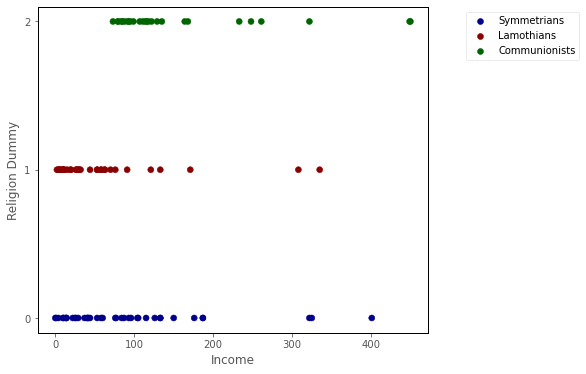

In [4]:
relig_color = {0: 'darkblue',
              1: 'darkred',
              2: 'darkgreen'}

fig, ax = plt.subplots()
ax.scatter(df['income'], df['religion_dummy'] , c = df['religion_dummy'].map(relig_color))
ax.set_yticks([0,1,2])
ax.set_ylabel('Religion Dummy')
ax.set_xlabel('Income')
ax.scatter([], [], color = 'darkblue', label = 'Symmetrians' )
ax.scatter([], [],  color = 'darkred', label = 'Lamothians')
ax.scatter([], [],  color = 'darkgreen', label = 'Communionists')
plt.legend(bbox_to_anchor = (1.4,1))
plt.show()

In [5]:
def mnlogit_cost(intercept_and_slope, x, y):

    intercept_1, slope_1, intercept_2, slope_2, = intercept_and_slope
    
    predicted_log_odds_1 = intercept_1 + slope_1 * x
    predicted_log_odds_2 = intercept_2 + slope_2 * x

    y_dummies = pd.get_dummies(y)
     
    log_likelihood = np.sum(y_dummies[1].values * predicted_log_odds_1 + y_dummies[2].values * predicted_log_odds_2 - np.log(1 + np.exp(predicted_log_odds_1) +  np.exp(predicted_log_odds_2)))

    return -log_likelihood

In [6]:
mnlogit_cost([.1,.1,.1,.1], df['income'], df['religion_dummy'])

429.62533819189144

In [7]:
from scipy.optimize import minimize

minimize(mnlogit_cost, [1,1,1,1], args =(df['income'], df['religion_dummy']), tol = 1e-16)

      fun: 100.04900882628
 hess_inv: array([[ 1.00670290e-01,  3.26817763e-04, -1.00280401e-01,
         5.22573156e-04],
       [ 3.26817763e-04,  2.01889572e-05, -3.06474140e-04,
         3.60986781e-06],
       [-1.00280401e-01, -3.06474140e-04,  9.99614906e-02,
        -5.18883633e-04],
       [ 5.22573156e-04,  3.60986781e-06, -5.18883633e-04,
         5.68063299e-06]])
      jac: array([ 2.86102295e-06,  2.54631042e-04, -1.90734863e-06, -9.05990601e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 253
      nit: 19
     njev: 42
   status: 2
  success: False
        x: array([ 0.40858774, -0.00724928, -1.11400237,  0.00593158])

In [8]:
mod = sm.MNLogit(df['religion_dummy'], sm.add_constant(df['income'])).fit()

mod.summary()

Optimization terminated successfully.
         Current function value: 1.000490
         Iterations 6


C:\Users\rushpz\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:         religion_dummy   No. Observations:                  100
Model:                        MNLogit   Df Residuals:                       96
Method:                           MLE   Df Model:                            2
Date:                Tue, 21 Jun 2022   Pseudo R-squ.:                 0.07781
Time:                        14:35:37   Log-Likelihood:                -100.05
converged:                       True   LL-Null:                       -108.49
Covariance Type:            nonrobust   LLR p-value:                 0.0002157
====================================================================================
religion_dummy=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4086      0.352      1.162      0.245      -0.281       1.098
income              -0.0072      0.004     -1.872      0.061      -0.015       0.000
------------------------------------------------------------------------------------
religion_dummy=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.1140      0.402     -2.769      0.006      -1.903      -0.325
income               0.0059      0.003      2.296      0.022       0.001       0.011
====================================================================================
"""

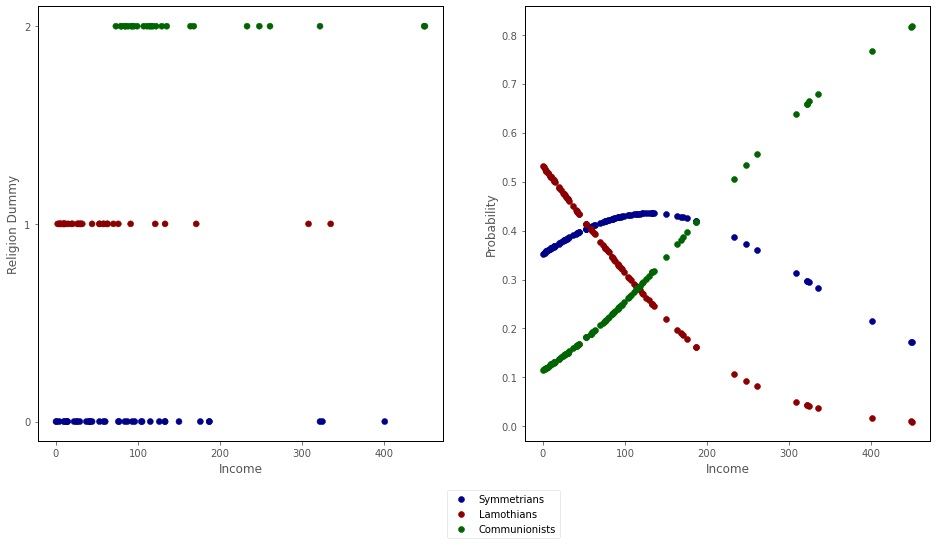

In [9]:
log_odds_predictions_1 = mod.params.loc['const', 0] +  mod.params.loc['income', 0] * df['income']
log_odds_predictions_2 = mod.params.loc['const', 1] +  mod.params.loc['income', 1] * df['income']

probability_predictions_1 = np.exp(log_odds_predictions_1)/(1 + np.exp(log_odds_predictions_1) + np.exp(log_odds_predictions_2))

probability_predictions_2 = np.exp(log_odds_predictions_2)/(1 + np.exp(log_odds_predictions_1) + np.exp(log_odds_predictions_2))

probability_predictions_0 = 1 - probability_predictions_1 - probability_predictions_2

relig_color = {0: 'darkblue',
              1: 'darkred',
              2: 'darkgreen'}

fig, ax = plt.subplots(nrows =1, ncols=2, figsize = (16, 8))
ax[0].scatter(df['income'], df['religion_dummy'] , c = df['religion_dummy'].map(relig_color))
ax[0].set_yticks([0,1,2])
ax[0].set_ylabel('Religion Dummy')
ax[0].set_xlabel('Income')
ax[1].scatter(df['income'], probability_predictions_0, color = 'darkblue', label = 'Symmetrians' )
ax[1].scatter(df['income'], probability_predictions_1, color = 'darkred', label = 'Lamothians')
ax[1].scatter(df['income'], probability_predictions_2, color = 'darkgreen', label = 'Communionists')
ax[1].set_ylabel('Probability')
ax[1].set_xlabel('Income')
plt.legend(bbox_to_anchor = (0.1,-0.1))
plt.show()

## Multi-predictor multionomial logistic regression

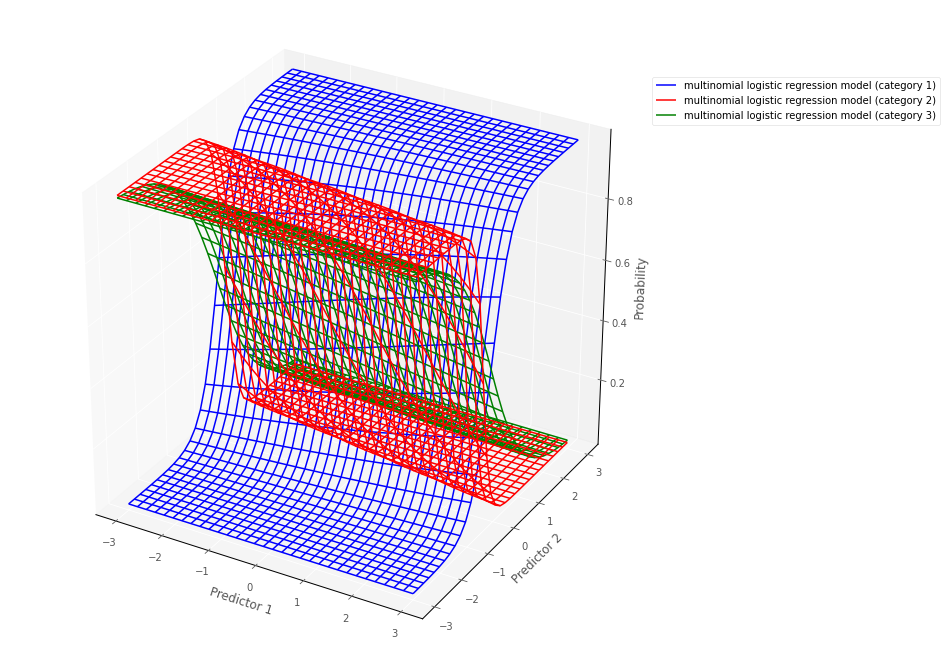

In [10]:
# show how multinomial logistic regression works in multiple dimensions

# figure out how to generate multiple

from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

x_slope = 0.2
y_slope = 3
 
x = np.outer(np.linspace(-3, 3, 32), np.ones(32))
y = x.copy().T # transpose
lin_pop_z = x_slope*x + y_slope*y
z = np.exp(lin_pop_z)/(1 + np.exp(lin_pop_z))

x_slope2 = -1
y_slope2 = -6
 

lin_pop_z2 = x_slope2*x + y_slope2*y
z2 = np.exp(lin_pop_z2)/(1 + np.exp(lin_pop_z2))

x_slope3 = -0.1
y_slope3 = -1.5
 

lin_pop_z3 = x_slope3*x + y_slope3*y
z3 = np.exp(lin_pop_z3)/(1 + np.exp(lin_pop_z3))



from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize = (12,12))
ax1 = fig.add_subplot(111, projection='3d')
ax1.plot_wireframe(x,y,z, color = 'blue', label = 'multinomial logistic regression model (category 1)')
ax1.plot_wireframe(x,y,z2, color = 'red', label = 'multinomial logistic regression model (category 2)')
ax1.plot_wireframe(x,y,z3, color = 'green', label = 'multinomial logistic regression model (category 3)')
plt.xlabel('Predictor 1')
plt.ylabel('Predictor 2')
ax1.set_zlabel('Probability')
plt.legend(bbox_to_anchor = (1.4,0.9))
plt.show()

In [11]:
mod = sm.MNLogit(df['religion_dummy'], sm.add_constant(df[['income', 'biological_sex_dummy']])).fit()

mod.summary()

Optimization terminated successfully.
         Current function value: 0.985475
         Iterations 6


C:\Users\rushpz\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:         religion_dummy   No. Observations:                  100
Model:                        MNLogit   Df Residuals:                       94
Method:                           MLE   Df Model:                            4
Date:                Tue, 21 Jun 2022   Pseudo R-squ.:                 0.09165
Time:                        14:35:38   Log-Likelihood:                -98.548
converged:                       True   LL-Null:                       -108.49
Covariance Type:            nonrobust   LLR p-value:                 0.0005260
========================================================================================
    religion_dummy=1       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.6011      0.492      1.221      0.222      -0.364       1.566
income                  -0.0077      0.004     -1.891      0.059      -0.016       0.000
biological_sex_dummy    -0.3145      0.502     -0.626      0.531      -1.299       0.670
----------------------------------------------------------------------------------------
    religion_dummy=2       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.6314      0.485     -1.301      0.193      -1.583       0.320
income                   0.0049      0.003      1.840      0.066      -0.000       0.010
biological_sex_dummy    -0.9978      0.589     -1.695      0.090      -2.151       0.156
========================================================================================
"""

In [12]:
def three_D_model_plot_multinomial(x_name, y_name, z_name, intercept, x_slope, y_slope,  intercept_2, x_slope_2, y_slope_2, 
                                   df, model_name):
    
    x = np.linspace(np.min(df[x_name]), np.max(df[x_name]), 8)
    y = np.linspace(np.min(df[y_name]), np.max(df[y_name]), 8)
    x, y = np.meshgrid(x, y)

        
    
    z = (np.exp(intercept + x_slope * x.ravel() + y_slope * y.ravel()))/(1 + np.exp(intercept + x_slope * x.ravel() + y_slope * y.ravel()) + np.exp(intercept_2 + x_slope_2 * x.ravel() + y_slope_2 * y.ravel()))
    z2 = (np.exp(intercept_2 + x_slope_2 * x.ravel() + y_slope_2 * y.ravel()))/(1 + np.exp(intercept + x_slope * x.ravel() + y_slope * y.ravel()) + np.exp(intercept_2 + x_slope_2 * x.ravel() + y_slope_2 * y.ravel()))
    z3 = 1 - z - z2

    
    fig = plt.figure(figsize = (16, 8))
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_wireframe(x, y,
                    z.reshape(x.shape), label = model_name+' (Lamothians)', color = 'red', alpha = 0.5)
    ax1.plot_wireframe(x, y,
                    z2.reshape(x.shape), label = model_name+ ' (Communionists)', color = 'green', alpha = 0.5)
    ax1.plot_wireframe(x, y,
                    z3.reshape(x.shape), label = model_name+ ' Symmetrians)', color = 'blue')
    ax1.view_init(azim = 30)
    ax1.set_yticks([0,1])
    ax1.set_zticks([0,1])
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    ax1.set_zlabel('Probability')
    ax1.legend(bbox_to_anchor = (1,0))
 
    
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(df[x_name], df[y_name], df[z_name], c = df['religion_dummy'].map(relig_color))
    ax2.view_init(azim = 30)
    ax2.set_yticks([0,1])
    ax2.set_zticks([0,1, 2])
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    ax2.set_zlabel(z_name)
    plt.show()

In [13]:
intercept_1, income_slope_1, biological_sex_dummy_slope_1 = mod.params[0][:]
intercept_2, income_slope_2, biological_sex_dummy_slope_2 = mod.params[1][:]

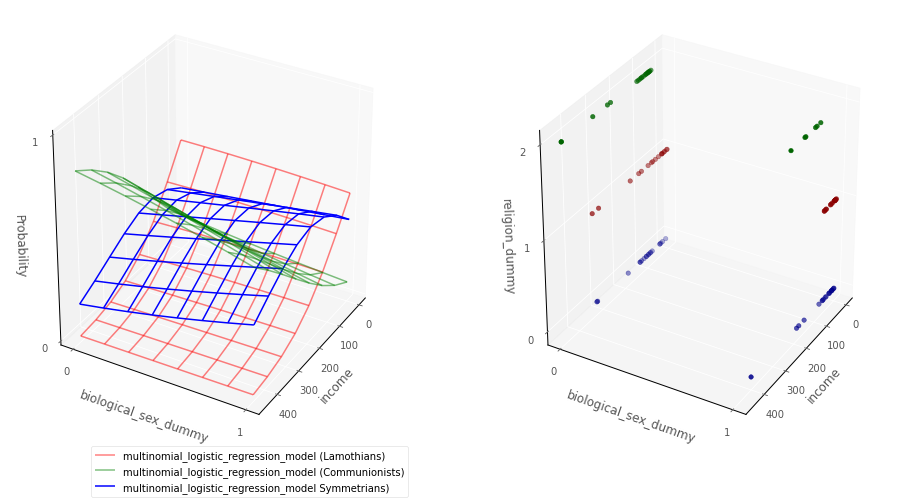

In [14]:
three_D_model_plot_multinomial('income', 'biological_sex_dummy', 
                   'religion_dummy', intercept_1, income_slope_1, biological_sex_dummy_slope_1, intercept_2, income_slope_2, biological_sex_dummy_slope_2,
                  df, 'multinomial_logistic_regression_model')

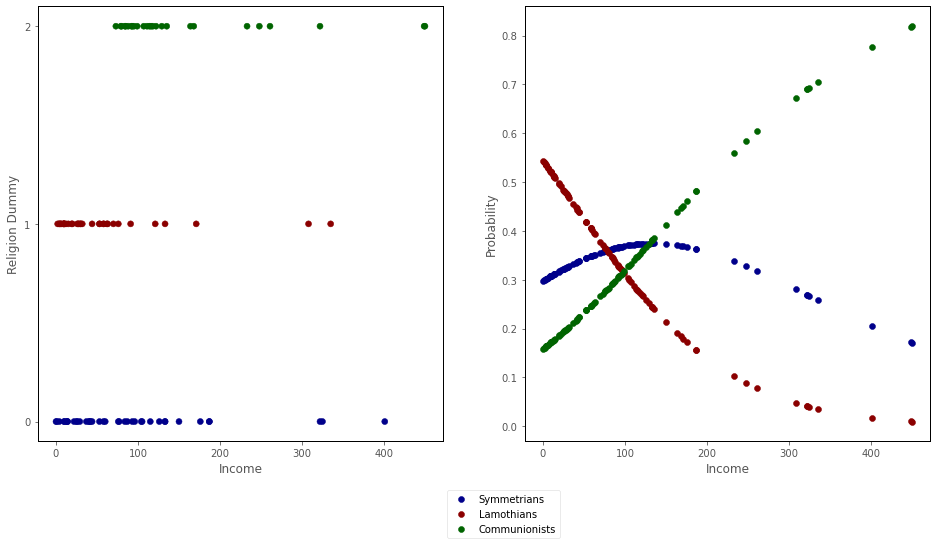

In [18]:
# easier to see pattern on this plot

fig, ax = plt.subplots(nrows =1, ncols=2, figsize = (16, 8))
ax[0].scatter(df['income'], df['religion_dummy'] , c = df['religion_dummy'].map(relig_color))
ax[0].set_yticks([0,1,2])
ax[0].set_ylabel('Religion Dummy')
ax[0].set_xlabel('Income')
ax[1].scatter(df['income'], probability_predictions_0, color = 'darkblue', label = 'Symmetrians' )
ax[1].scatter(df['income'], probability_predictions_1, color = 'darkred', label = 'Lamothians')
ax[1].scatter(df['income'], probability_predictions_2, color = 'darkgreen', label = 'Communionists')
ax[1].set_ylabel('Probability')
ax[1].set_xlabel('Income')
plt.legend(bbox_to_anchor = (0.1,-0.1))
plt.show()

## Interpretation (multiple predictors)

The coefficient of each predictor tells us the predicted difference in the outcome variable scores for two observations which differed *only* by a one unit score in that predictor. E.g. which had the same score on all other predictors.

The intercept tells us the predicted score on the outcome variable for an observation whose score on all other predictors was 0. 

## Statistical interaction in Multinomial Logistic Regression

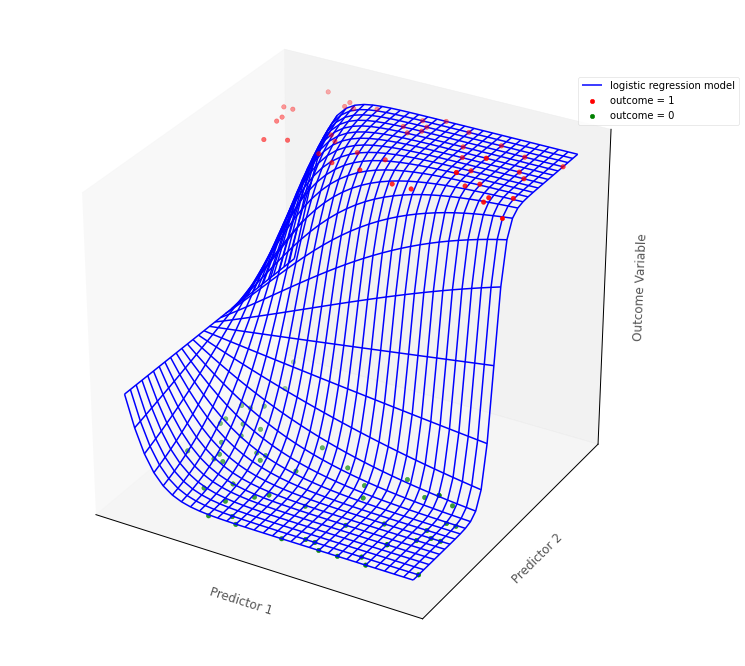

In [16]:
x_slope = 0.2
y_slope = 3
 
x = np.outer(np.linspace(-3, 3, 32), np.ones(32))
y = x.copy().T # transpose
lin_pop_z = x_slope*x + y_slope*y + 1*x*y
z = np.exp(lin_pop_z)/(1 + np.exp(lin_pop_z))

data_x = np.random.choice(np.linspace(-3, 3, 32), size = 100)
data_y = np.random.choice(np.linspace(-3, 3, 32), size = 100)
lin_pred = x_slope*data_x + y_slope*data_y + 1*data_x*data_y + np.random.normal(0, 0.3, size = 100)
data_z = (np.exp(lin_pred))/(1 + np.exp(lin_pred))
data_z = np.where(data_z >= 0.5, 1, 0)

from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize = (12,12))
ax1 = fig.add_subplot(111, projection='3d')
ax1.plot_wireframe(x,y,z, color = 'blue', label = 'logistic regression model')
ax1.scatter(data_x[data_z >= 0.5], data_y[data_z >= 0.5], data_z[data_z >= 0.5], color = 'red', label = 'outcome = 1')
ax1.scatter(data_x[data_z < 0.5], data_y[data_z < 0.5], data_z[data_z < 0.5], color = 'green', label = 'outcome = 0'  )
ax1.set_zticks([0,1])
plt.xlabel('Predictor 1')
plt.ylabel('Predictor 2')
ax1.set_zlabel('Outcome Variable')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])
plt.legend(bbox_to_anchor = (1.1,0.9))
plt.show()

## Other Chapters

1. [What are Generalized Linear Models?](1_generalized_linear_models.ipynb)
2. [Linear Regression](2_linear_regression.ipynb)
3. [Poisson Regression](3_poisson_regression.ipynb)
4. [Binary Logistic Regression](4_binary_logistic_regression.ipynb)
5. [Multinomial Logistic Regression](5_multinomial_logistic_regression.ipynb)

***
By [pxr687](99_about_the_author.ipynb) 